# Analyse False Classifications

In [57]:
%run ../scripts/load_df_for_analysis.py

In [58]:
model_type = "full_model"
embedding = "te3l"
no_prev_chunking = True
batched = False
model = "llama3.1:70b"

In [59]:
df = load_df(model_type, embedding, no_prev_chunking, model, batched)
df = reshape_model_classification(df)

In [60]:
df

,Source,Citing Article ID,Citing Article DOI,Citing Article Title,Citing Article Retracted,Citing Article Downloaded,Domain,Statement with Citation,Reference Article ID,Reference Article DOI,...,Reference Article PDF Available,Reference Article Retracted,Reference Article Downloaded,Label,Explanation,Top_3_Chunk_IDs,Top_3_Chunk_Texts,Model Classification,Model Classification Label,Model Classification Explanation
0,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,Others have aimed to reduce irreversibility or...,r001,10.1155/2021/2087027,...,Yes,No,Yes,unsubstantiate,Irrelevant,"[d5149dde-3f61-477d-acd9-0c8f97b154b5, f834613...",[Automatic implementation of fuzzy reasoning s...,Here is the answer in JSON format:\n\n```\n{\n...,unsubstantiate,The reference article does not mention reducin...
1,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,Some researchers have also studied various hea...,r002,10.1016/j.physa.2018.12.031,...,Yes,No,Yes,unsubstantiate,Irrelevant,"[dc4cd1b8-1ae4-4c15-be29-a4eb6e4270ba, 6210cc4...",[Heat transfer improvement of water/single-wal...,"Here is the JSON response:\n\n```\n{\n ""label...",unsubstantiate,The reference article does not mention heat ex...
2,PubPeer,c002,10.1155/2022/4601350,Oxidative Potential and Nanoantioxidant Activi...,Yes,Yes,Chemistry,The relative content of total flavonoids in th...,r003,10.1088/1742-6596/1937/1/012038,...,Yes,No,Yes,unsubstantiate,Irrelevant,"[2eeaa48b-a7ec-4674-87ac-511b439139c8, 0d45e20...",[The correspondence curve for our photochemica...,"Here is my assessment:\n\n```\n{\n""label"": ""Un...",unsubstantiate,The reference article does not mention flavono...
3,PubPeer,c003,10.1155/2022/2408685,The Choice of Anesthetic Drugs in Outpatient H...,Yes,Yes,Medicine,Research has shown that remimazolam tosylate e...,r004,10.1186/s12871-018-0543-3,...,Yes,No,Yes,unsubstantiate,Irrelevant,"[c6131293-c506-4347-8441-06e480444093, 821ac75...",[Determination of the median effective concent...,Here is my response in JSON format:\n\n```\n{\...,unsubstantiate,The reference article does not mention remimaz...
4,PubPeer,c004,10.1155/2022/4783847,A Fault-Tolerant Structure for Nano-Power Comm...,Yes,Yes,Engineering,if the efficiency of the routing algorithm is ...,r005,10.36410/jcpr.2022.23.3.312,...,Yes,No,Yes,unsubstantiate,Irrelevant,"[65b14485-4faa-441e-9aac-9967bad1f603, 8b03de6...","[In the table, China's intermediary centrality...","Here is my evaluation:\n\n```\n{\n ""label"": ""...",unsubstantiate,The reference article does not mention anythin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"Smith & Cumberledge, 2020",c175,10.1038/ncomms15218,Fast oxygen diffusion and iodide defects media...,No,Yes,Chemistry,The impact of film microstructure on charge ca...,r239,10.1063/1.4889845,...,Yes,No,Yes,fully substantiate,NaN,"[ef49c54b-c1bb-4c37-bac1-97ddc88e1fdc, 963d14e...",[(September 2014) Charge carrier recombination...,"Here is my evaluation:\n\n```\n{\n ""label"": ""...",partially substantiate,The reference article discusses the impact of ...
246,"Smith & Cumberledge, 2020",c176,10.1038/ncomms16007,Muscle-specific CRISPR/Cas9 dystrophin gene ed...,No,Yes,Medicine,Mutations in the dystrophin (DMD) gene result ...,r240,10.1038/345315a0,...,Yes,No,Yes,fully substantiate,NaN,"[599112b9-0ec3-4201-9f3c-ef23179e4124, 723b0db...","[Thus, the absence of dystrophin may lead to t...","```\n{\n ""label"": ""Partially substantiated"",\...",partially substantiate,The reference article confirms that mutations ...
247,"Smith & Cumberledge, 2020",c085,10.1038/s41467-017-00519-2,Nanodiamonds suppress the growth of lithium de...,No,Yes,Chemistry,Aggregation of nanodiamond particles cannot be...,r241,10.1016/j.diamond.2008.01.033,...,Yes,No,Yes,fully substantiate,NaN,"[75d41c51-ee88-4c4b-9637-6e5737b6cb2a, d20caea...",[In the latt

In [61]:
def get_false_prediction_rows(df, include_not_originally_downloaded=True):
    false_predicted_indices = []
    for index, row in df.iterrows():
        if row['Reference Article Downloaded'] == 'Yes':
            if include_not_originally_downloaded or row['Reference Article PDF Available'] == 'Yes':
                target_label = row['Label']
                model_label = row['Model Classification Label']

                if model_label not in ['unsubstantiate', 'partially substantiate', 'fully substantiate']:
                    print(f"Row {index} Model Classification Label is not a valid label: {model_label}")
                    false_predicted_indices.append(index)
                    continue

                if target_label != model_label:
                    false_predicted_indices.append(index)

    false_predictions_df = df.loc[false_predicted_indices]
    return false_predictions_df

In [62]:
df_false_preds = get_false_prediction_rows(df)

In [63]:
df_false_preds

,Source,Citing Article ID,Citing Article DOI,Citing Article Title,Citing Article Retracted,Citing Article Downloaded,Domain,Statement with Citation,Reference Article ID,Reference Article DOI,...,Reference Article PDF Available,Reference Article Retracted,Reference Article Downloaded,Label,Explanation,Top_3_Chunk_IDs,Top_3_Chunk_Texts,Model Classification,Model Classification Label,Model Classification Explanation
52,PubPeer,c032,10.2298/gensr2103331l,Genetic diversity and gene-pool of Aegilops ta...,Yes,Yes,Biology,"Randomly amplified polymorphic DNA (RAPD), amp...",r050,10.3103/S0095452718040102,...,Yes,No,Yes,unsubstantiate,Different plant species,"[271dd683-9ba0-4b0b-be2a-859036c9d99f, 1a63080...","[But it is considered to be anodyne, astringen...","Here is my answer:\n\n```\n{\n""label"": ""Partia...",partially substantiate,"The reference article mentions ISSR, but not t..."
79,PubPeer,c044,10.1007/s13204-021-02325-1,Solar radiation impact on ferrofluid convectio...,Yes,Yes,Physics,The nanoliquids are a mixture of typical fluid...,r076,10.1016/j.egyr.2021.04.046,...,Yes,No,Yes,unsubstantiate,Irrelevant,"[e27c220c-8404-45b5-84b1-a3a699b37a5e, 6c7614b...",[MWCNT has extraordinary thermal properties an...,"```\n{\n""label"": ""Partially substantiate"",\n""e...",partially substantiate,The reference article mentions the improved th...
82,Correction,c046,10.3390/jcdd8050052,Peptidic Connexin43 Therapeutics in Cardiac Re...,No,Yes,Medicine,Other investigations of Peptide5 in preclinica...,r079,10.1186/s12964-020-00558-1,...,Yes,No,Yes,unsubstantiate,Wrong reference,"[1d09100b-02c2-4b58-98f7-10cab86d77dd, b6b45a9...",[Co-incubation of both HK2 and hPTECS with TGF...,Here is the evaluation of the statement:\n\n``...,fully substantiate,The reference article provides evidence that P...
94,"Smith & Cumberledge, 2020",c055,10.1126/science.aag3055,Vertically extensive and unstable magmatic sys...,No,Yes,Geology,At very high crystallinities (very low melt pe...,r088,10.1007/s00126-002-0312-5,...,Yes,No,Yes,partially substantiate,Lost a condition,"[4c5ef8a9-ef43-47d3-9aea-320c2d8fb08a, dc867b9...",[This overpressure is in addition to any overp...,"{\n""label"": ""Fully substantiate"",\n""explanatio...",fully substantiate,The reference article fully supports the state...
95,"Smith & Cumberledge, 2020",c056,10.1126/science.aam7928,Inflammation and metabolism in tissue repair a...,No,Yes,Biology,"For example, a recent study exploring the mech...",r089,10.1073/pnas.1304046110,...,Yes,No,Yes,unsubstantiate,Required vs. facilitate,"[d5d4d850-eeac-43e1-a0b0-623b763788bd, 4bb2422...","[Interestingly, signaling via the IL-4Rα in my...","Here is my assessment:\n\n```\n{\n""label"": ""Fu...",fully substantiate,The reference article directly supports the st...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,"Smith & Cumberledge, 2020",c174,10.1073/pnas.1705768114,Dual role of mitochondria in producing melaton...,No,Yes,Biology,"However, recent identification of GPCRs on int...",r237,10.1038/nature12000,...,Yes,No,Yes,fully substantiate,NaN,"[f4c891bf-0a37-4c13-bdcb-db2fe8721050, a4ec3b8...",[It has been subsequently proposed that signal...,Here is the evaluation in JSON format:\n\n```\...,partially substantiate,The reference article supports the idea that G...
244,"Smith & Cumberledge, 2020",c083,10.1073/pnas.1614777114,Disrupting the blood-brain barrier by focused ...,No,Yes,Medicine,BBBD and changes in TJP expression represent o...,r238,10.1007/s00018-013-1459-1,...,Yes,No,Yes,fully substantiate,NaN,"[88d8d35f-2f47-4811-98d4-1cb964235dce, 11b091d...","[ZO-1, the first identified accessory protein ...","{\n""label"": ""Unsubstantiate"",\n""explanation"": ...",unsubstantiate,The reference article does not mention the use...
245,"Smith & Cumberledge, 2020",c175,10.1038/ncomms15218,Fast oxygen diffusion and iodide defects media...,No,Yes,Chemistry,The impact of film microstructure on charge ca...,r239,10.1063

## Distribution Comparison - False Classified vs. all

In [64]:
%run ../scripts/data_visualisations.py

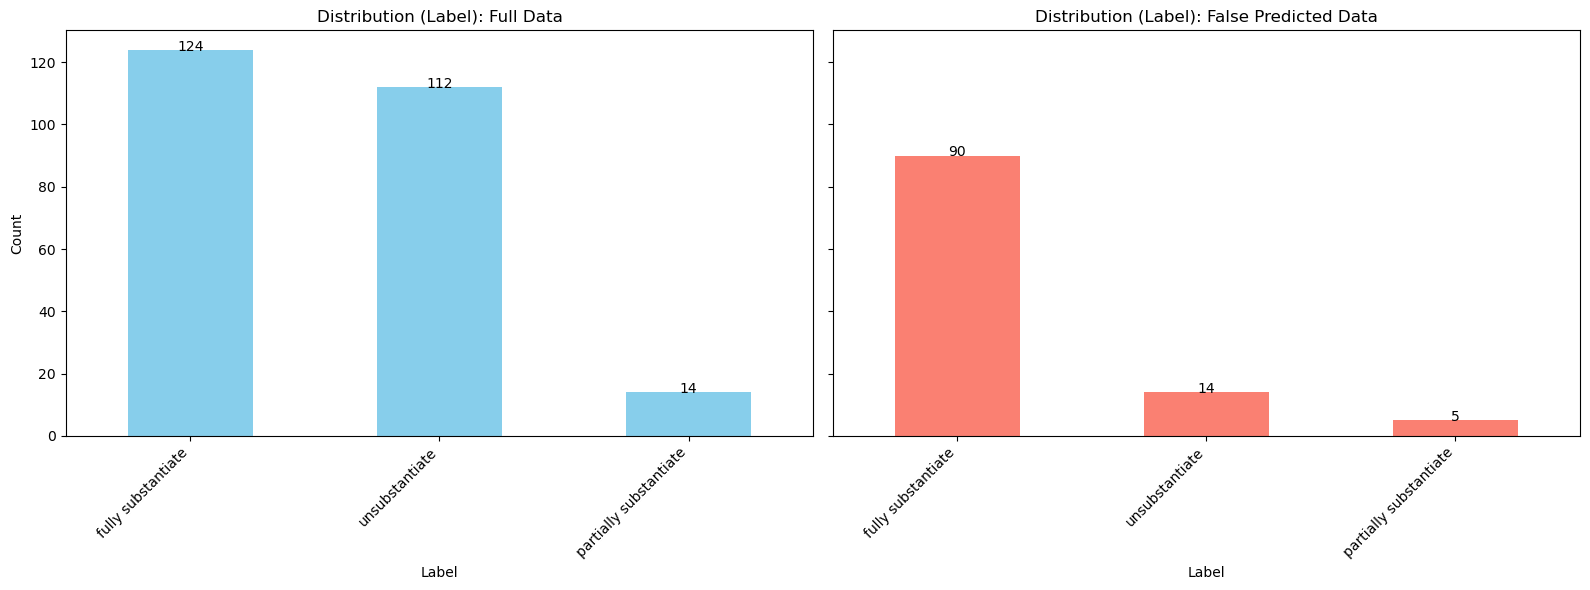

In [73]:
show_distribution_comparison(df, df_false_preds, "Label")

The fully substantiated entries tend to be more often false classified than the unsubstantiated entries.

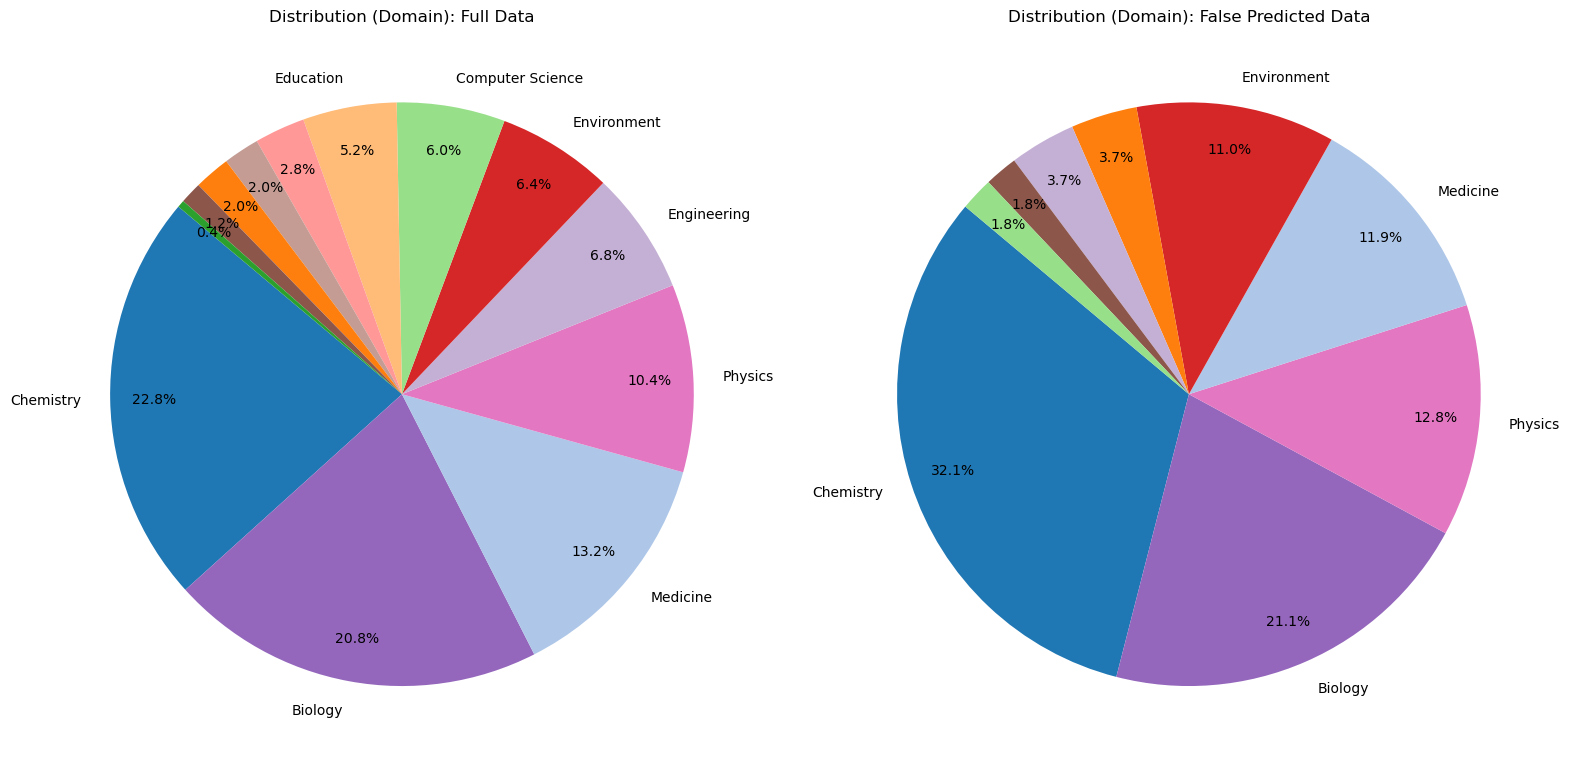

In [65]:
show_distribution_comparison_pie(df, df_false_preds, "Domain")

The model seems to be rather good at classifying the Computer Science Data for example, but worse when it comes to Chemistry or Physics.

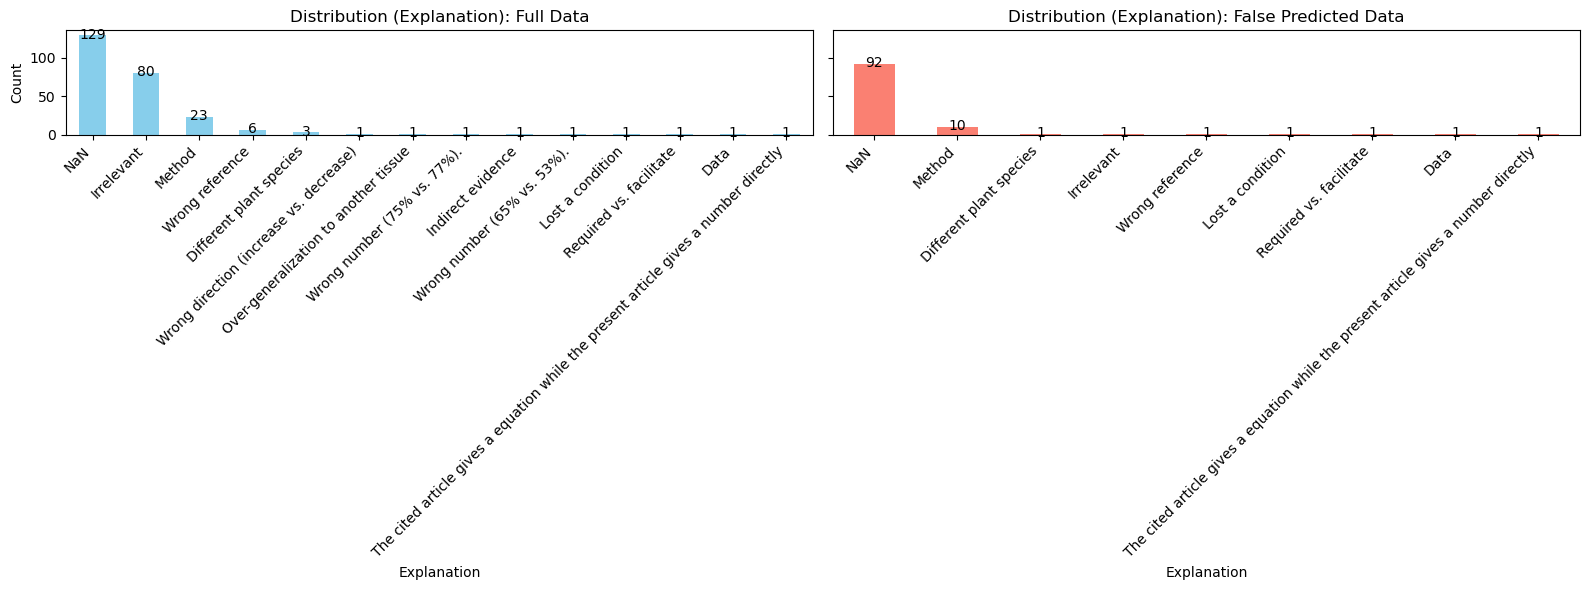

In [66]:
show_distribution_comparison(df, df_false_preds, "Explanation")

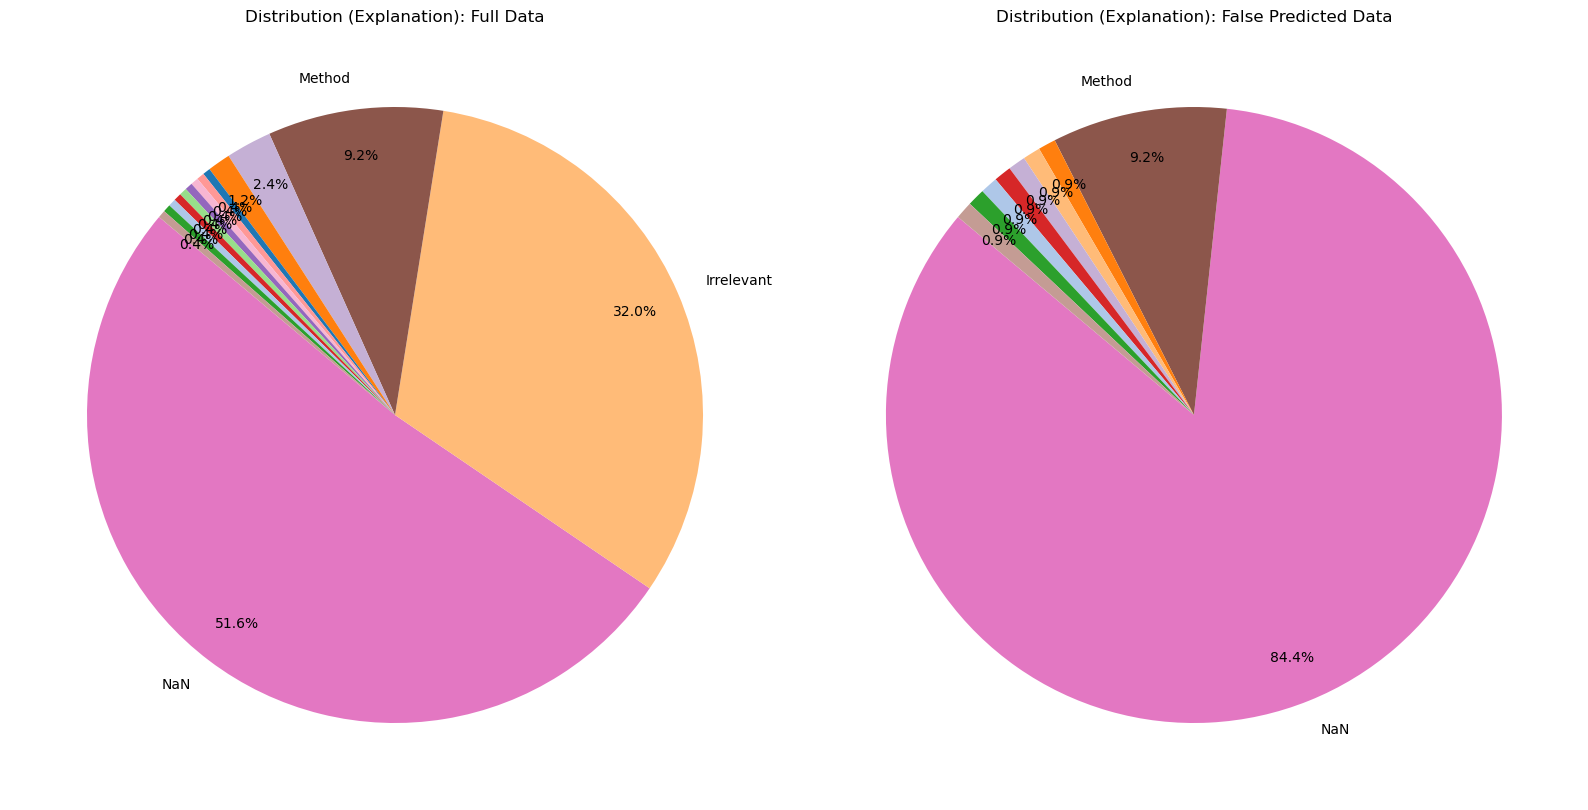

In [67]:
show_distribution_comparison_pie(df, df_false_preds, "Explanation", label_threshold_percent=5)

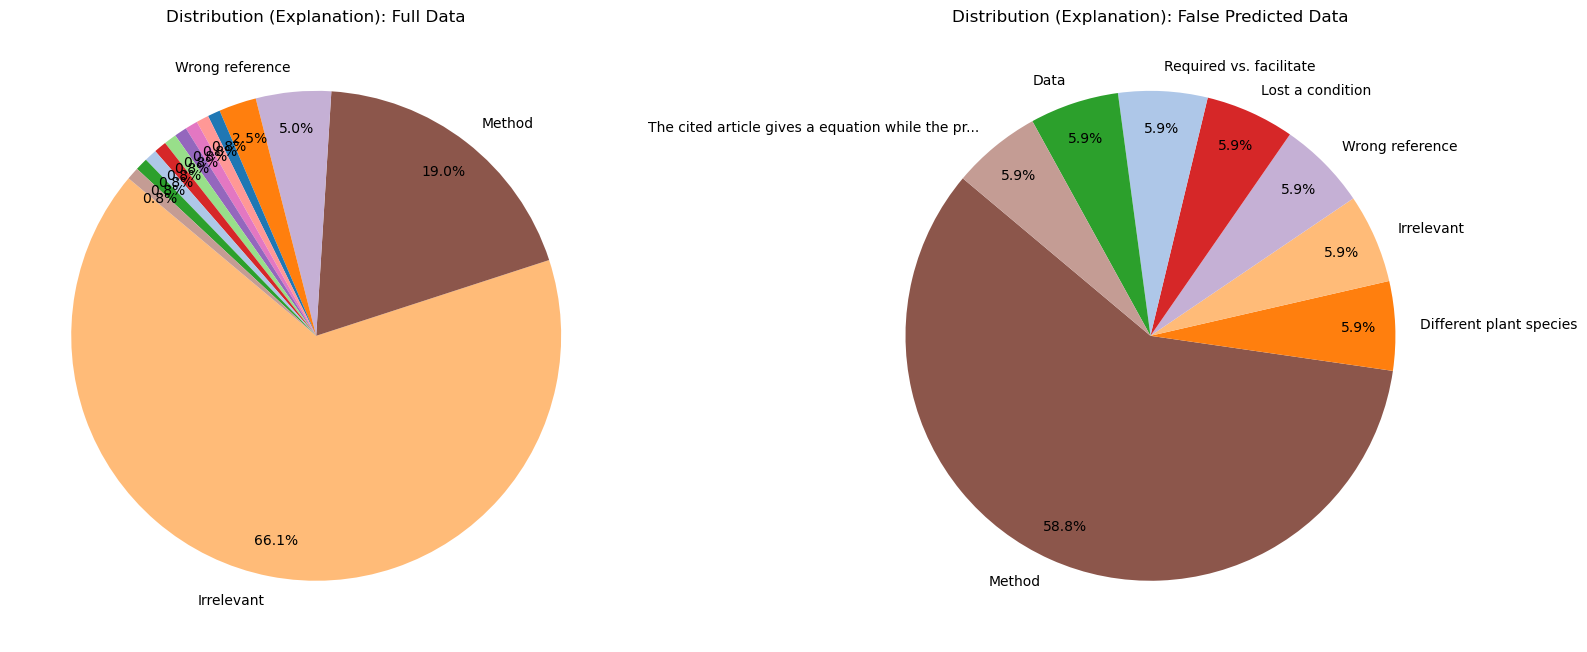

In [68]:
show_distribution_comparison_pie(df, df_false_preds, "Explanation", include_nan=False, label_threshold_percent=5)

It can be clearly seen that the model is very good at detecting unsubstantiated claims due to the reference being irrelevant (only 1/80 false classified). It seems to struggle far more with the rows where as explanation "Method" is given, which need to be investigated further.

### Filter for different error types than Irrelevant

In [72]:
error_types_df = df[
    (
        (df['Label'].isin(['unsubstantiate', 'partially substantiate'])) &
        (df['Explanation'].notna()) &
        (df['Explanation'] != 'Irrelevant')
    )
]
error_types_df

,Source,Citing Article ID,Citing Article DOI,Citing Article Title,Citing Article Retracted,Citing Article Downloaded,Domain,Statement with Citation,Reference Article ID,Reference Article DOI,...,Reference Article PDF Available,Reference Article Retracted,Reference Article Downloaded,Label,Explanation,Top_3_Chunk_IDs,Top_3_Chunk_Texts,Model Classification,Model Classification Label,Model Classification Explanation
46,PubPeer,c030,10.2298/gensr2201173y,Evaluation of genetic variability Rindera usin...,Yes,Yes,Biology,"Bees, flies, and honeybees [citation] pollinat...",r044,10.1098/rsbl.2019.0230,...,Yes,No,Yes,unsubstantiate,Different plant species,"[952c38e3-2cbe-42e8-908a-a5311da4a172, c125cbd...",[They are obligate floral-visitors with more t...,"Here is my evaluation:\n\n```\n{\n""label"": ""Un...",unsubstantiate,The reference article does not mention Rindera...
47,PubPeer,c030,10.2298/gensr2201173y,Evaluation of genetic variability Rindera usin...,Yes,Yes,Biology,Shared alleles are related to self-pollination...,r045,10.2307/2656852,...,Yes,No,Yes,unsubstantiate,Different plant species,"[f303eca2-a538-43bc-b5f4-ee8545746d58, 20226f4...",[Such protandry suggests that avoidance of sel...,"Here is my evaluation:\n\n```\n{\n ""label"": ""...",unsubstantiate,The reference article does not mention Rindera...
52,PubPeer,c032,10.2298/gensr2103331l,Genetic diversity and gene-pool of Aegilops ta...,Yes,Yes,Biology,"Randomly amplified polymorphic DNA (RAPD), amp...",r050,10.3103/S0095452718040102,...,Yes,No,Yes,unsubstantiate,Different plant species,"[271dd683-9ba0-4b0b-be2a-859036c9d99f, 1a63080...","[But it is considered to be anodyne, astringen...","Here is my answer:\n\n```\n{\n""label"": ""Partia...",partially substantiate,"The reference article mentions ISSR, but not t..."
80,Correction,c045,10.1037/amp0000819,The social neuroscience of music: Understandin...,No,No,Biology,We know that oxytocin is released when listeni...,r077,10.3389/fnhum.2017.00430,...,Yes,No,Yes,unsubstantiate,Wrong direction (increase vs. decrease),"[0996d3a9-c11a-45fb-a89b-e98301aff8b3, 09a76c8...","[Of course, it may be that positive bilateral ...","{\n""label"": ""Unsubstantiate"",\n""explanation"": ...",unsubstantiate,The reference article actually contradicts the...
81,Correction,c046,10.3390/jcdd8050052,Peptidic Connexin43 Therapeutics in Cardiac Re...,No,Yes,Medicine,A review characterizing the possible mechanism...,r078,10.1016/j.bbamem.2017.05.016,...,Yes,No,Yes,unsubstantiate,Wrong reference,"[b7911d3f-e9bb-4b04-bfa2-8f0946642151, 8895e90...",[Opening of pannexin-and connexin-based channe...,"{\n""label"": ""Unsubstantiate"",\n""explanation"": ...",unsubstantiate,The reference article does not mention extrace...
82,Correction,c046,10.3390/jcdd8050052,Peptidic Connexin43 Therapeutics in Cardiac Re...,No,Yes,Medicine,Other investigations of Peptide5 in preclinica...,r079,10.1186/s12964-020-00558-1,...,Yes,No,Yes,unsubstantiate,Wrong reference,"[1d09100b-02c2-4b58-98f7-10cab86d77dd, b6b45a9...",[Co-incubation of both HK2 and hPTECS with TGF...,Here is the evaluation of the statement:\n\n``...,fully substantiate,The reference article provides evidence that P...
83,Correction,c046,10.3390/jcdd8050052,Peptidic Connexin43 Therapeutics in Cardiac Re...,No,Yes,Medicine,Other investigations of Peptide5 in preclinica...,r080,10.3389/fncel.2014.00306,...,Yes,No,Yes,unsubstantiate,Wrong reference,"[b35afdbe-830d-41d6-a42b-e6ab3fb23bf9, 64f10f3...",[Peptides and peptide-derived molecules target...,Here is the answer in JSON format:\n\n```\n{\n...,unsubstantiate,The reference article does not mention Peptide...
84,Correction,c047,10.3390/cells10082086,Cell Therapy for Anal Sphincter Incontinence: ...,No,Yes,Medicine,"Most often, an anal sphincter tear is usually ...",r081,10.1186/s13287-016-0344-x,...,Yes,No,Yes,unsubstantiate,Wrong reference,"[b96a6687-a6d1-477e-b82c-17378fb521ec, 36b1aca...",[Recovery of injured external anal sphincter a...,Here is the answer 

In [74]:
error_types_df_false = get_false_prediction_rows(error_types_df)

In [76]:
len(error_types_df)

20

In [77]:
len(error_types_df_false)

6